In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy as sp
from sympy import init_printing
init_printing()


# Teoría de errores en computación

---
### Profesor: Juan Marcos Marín

---



# Underflow y Overflow

**Underflow** y **overflow** son conceptos relacionados con la representación de números en computadoras, especialmente en aritmética de punto flotante y enteros. El rango de un doble (64 bits) está en el intervalo $10^{-322} < x < 10^{308}$, es decir,  cualquier número fuera de este rango necesita más de 64 bits para ser representado, si $x$ es muy grande hay *overflow* y si es muy pequeño hay *underflow*.

Si hay *overflow* `python` imprime `inf` que significa infinito y si hay underflow python imprime `0.0`.

## Overflow

**Overflow** ocurre cuando un cálculo produce un número que es más grande que el valor máximo que puede ser representado en un tipo de dato específico.

### Ejemplo de Overflow en Python

```python
import numpy as np

max_value = np.finfo(np.float16).max
overflow_result = np.float16(max_value * 2)
print(f"Resultado del overflow: {overflow_result}")


In [2]:
max_value = np.finfo(np.float32).max
overflow_result = np.float128(max_value * 2)
print(f"Resultado del overflow: {overflow_result}")

Resultado del overflow: inf


/var/folders/5w/ny11d5qd64l4wnm6y_8w4wk80000gn/T/ipykernel_8259/3637204658.py:2: RuntimeWarning: overflow encountered in scalar multiply
  overflow_result = np.float128(max_value * 2)


## Underflow

**Underflow** ocurre cuando un cálculo produce un número que es más pequeño que el valor mínimo representable en un tipo de dato específico, especialmente en la aritmética de punto flotante. En este caso, el número puede ser redondeado a cero o al valor más cercano que se puede representar.

### Ejemplo de Underflow en Python

### Código

```python
import numpy as np

small_value = np.float32(1e-45)  # Un valor muy pequeño
underflow_result = np.float32(small_value / 10)  # Dividiendo por un número grande
print(f"Resultado del underflow: {underflow_result}")  # Salida: 0.0


In [3]:
small_value = np.float32(1e-45)  # Un valor muy pequeño
underflow_result = np.float64(small_value / 10)  # Dividiendo por un número grande
print(f"Resultado del underflow: {underflow_result}")  # Salida: 0.0

Resultado del underflow: 0.0


# Epsilon de la Máquina

El **epsilon de la máquina** (a menudo denotado como $\epsilon$) es un valor que representa la diferencia más pequeña entre 1 y el siguiente número que se puede representar en un sistema numérico en punto flotante. En otras palabras, es la cantidad más pequeña que, al sumarse a 1, produce un resultado distinto de 1. Este valor es fundamental en la aritmética de punto flotante y es crucial para comprender la precisión y la representación de números en las computadoras.

## Importancia del Epsilon de la Máquina

1. **Precisión Numérica**:
   - El epsilon de la máquina ayuda a determinar la precisión de los cálculos en un sistema numérico. Permite entender cuán cerca pueden estar los resultados de los cálculos respecto a los valores reales.

2. **Control de Errores**:
   - Al conocer el epsilon, los programadores pueden establecer umbrales para determinar si dos números son "suficientemente cercanos" para ser considerados iguales. Esto es especialmente útil en aplicaciones donde la precisión es crítica, como en cálculos científicos o financieros.

3. **Estabilidad Numérica**:
   - El epsilon de la máquina es una medida de la estabilidad numérica de un algoritmo. Un algoritmo que produce errores en comparación con el epsilon puede ser inestable y no confiable.

4. **Comparaciones de Números**:
   - Permite realizar comparaciones entre números en punto flotante de manera más efectiva. En lugar de usar comparaciones directas (que pueden fallar debido a la imprecisión), se pueden usar comparaciones relativas con el epsilon.

## Ejemplo

```python
import numpy as np

# Epsilon de la máquina para float32
epsilon_float32 = np.finfo(np.float32).eps
print(f"Epsilon de la máquina (float32): {epsilon_float32}")

# Epsilon de la máquina para float64
epsilon_float64 = np.finfo(np.float64).eps
print(f"Epsilon de la máquina (float64): {epsilon_float64}")


In [4]:
# Epsilon de la máquina para float32
epsilon_float32 = np.finfo(np.float32).eps
print(f"Epsilon de la máquina (float32): {epsilon_float32}")

# Epsilon de la máquina para float64
epsilon_float64 = np.finfo(np.float64).eps
print(f"Epsilon de la máquina (float64): {epsilon_float64}")

Epsilon de la máquina (float32): 1.1920928955078125e-07
Epsilon de la máquina (float64): 2.220446049250313e-16


## Ejemplo Numérico

Supongamos que tenemos el epsilon de la máquina para un tipo de dato de punto flotante de precisión simple (`float32`) que es aproximadamente $1.1920929 \times 10^{-7}$.

1. **Valor de Epsilon**:
   $$\epsilon \approx 1.1920929 \times 10^{-7}$$

2. **Suma con 1**:
   - Si sumamos $\epsilon$ a 1:
   $$1 + \epsilon \approx 1 + 1.1920929 \times 10^{-7} \approx 1.00000011920929$$
   - Este resultado es diferente de 1.

3. **Comparación sin Epsilon**:
   - Si sumamos un número menor que $\epsilon$ a 1:
   $$1 + \frac{\epsilon}{2} \approx 1 + 5.9604645 \times 10^{-8} \approx 1.000000059604645$$
   - En este caso, el resultado es considerado como 1, ya que no supera el umbral de precisión.

## Comparaciones Prácticas

- **Cálculo Exacto**:
  - $x = 1 + \epsilon$ se puede considerar como **diferente** de 1.
  
- **Cálculo Inexacto**:
  - $y = 1 + \frac{\epsilon}{2}$ se considera como **igual a** 1.

En aplicaciones donde se requiere alta precisión, conocer el epsilon de la máquina permite implementar controles de errores adecuados.


In [5]:
# Epsilon de la máquina
epsilon = np.finfo(np.float128).eps

print(f'El epsilon de la máquina es {epsilon}')
print(50*'#')
# Dos números que deberían ser iguales
a = 1.0
print(f'a = {a:.2f}')
b = 1.0 + epsilon/2
print(f'b = {b:.2f}')


# Comparación directa
if a == b:
    print("a es igual a b (comparación directa)")
else:
    print("a no es igual a b (comparación directa)")


# Comparación relativa
if abs(a - b) < epsilon:
    print("a es igual a b (comparación relativa)")
else:
    print("a no es igual a b (comparación relativa)")



El epsilon de la máquina es 1.0842021724855044e-19
##################################################
a = 1.00
b = 1.00
a es igual a b (comparación directa)
a es igual a b (comparación relativa)


In [6]:
# Epsilon de la máquina para float64
epsilon = np.finfo(float).eps

# Sumar 1e-6 un millón de veces
result = 0.0
for i in range(1000000):
    result += 1e-6

# Verificar si el resultado es aproximadamente igual a 1
if abs(result - 1.0) < epsilon:
    print("El resultado es aproximadamente 1.0")
else:
    print(f"El resultado no es 1.0, es: {result}")


El resultado no es 1.0, es: 1.000000000007918


# ¿Por qué 0.7 + 0.6 no es igual a 1.3?

El motivo por el cual la suma de `0.7 + 0.6` en algunas ocasiones **no es exactamente igual a 1.3** en los cálculos de las computadoras se debe a las **limitaciones de la representación en punto flotante**.

## Representación de Números en Punto Flotante

Las computadoras representan los números en punto flotante utilizando el estándar **IEEE 754**, que almacena los números como una combinación de bits para la mantisa, el exponente y el signo. Esto permite representar un rango muy amplio de números, pero **no todos los números decimales pueden representarse con exactitud** debido a la naturaleza binaria de los sistemas de cómputo.

- **Números como 0.7 y 0.6 no tienen una representación exacta en binario.** Son valores periódicos en binario, lo que significa que se almacenan con una aproximación.
  
Por ejemplo:
- `0.7` en binario es aproximadamente:

$$0.1011001100110011\ldots$$

- `0.6` en binario es aproximadamente:
  
$$0.1001100110011001\ldots$$

  Ambos son valores periódicos que no pueden ser representados exactamente en un número finito de bits. Como resultado, **al sumar estos valores, el resultado también es una aproximación**.



In [7]:
a = 0.7
b = 0.6
c = 1.3

print(a + b == c)   # Verifica si 0.7 + 0.6 es igual a 1.3
print(a + b)        # Imprime el resultado de 0.7 + 0.6
print(c)            # Imprime 1.3

False
1.2999999999999998
1.3


In [8]:
# Epsilon de la máquina
epsilon = np.finfo(float).eps
print(f'El epsilon de la máquina es {epsilon}')
print(50*'#')

# Margen de tolerancia (epsilon) adecuado
tolerancia = 1e-15


# Sumar 0.7 + 0.6
resultado = 0.7 + 0.6
esperado = 1.3

# Comparar con una tolerancia adecuada
if abs(resultado - esperado) < tolerancia:
    print(f"0.7 + 0.6 es aproximadamente igual a 1.3 con tolerancia {tolerancia}")
else:
    print(f"0.7 + 0.6 no es igual a 1.3, es: {resultado}")

# Comparar con el epsilon
if abs(resultado - esperado) < epsilon:
    print("0.7 + 0.6 es aproximadamente igual a 1.3")
else:
    print(f"0.7 + 0.6 no es igual a 1.3, es: {resultado}")



El epsilon de la máquina es 2.220446049250313e-16
##################################################
0.7 + 0.6 es aproximadamente igual a 1.3 con tolerancia 1e-15
0.7 + 0.6 no es igual a 1.3, es: 1.2999999999999998


# Errores de Aproximación

Los errores de aproximación ocurren cuando usamos una estimación o aproximación en lugar de un valor exacto en cálculos o mediciones. Estos errores son a menudo inevitables debido a limitaciones en la precisión, recursos computacionales o la naturaleza del problema en sí.

Hay dos tipos principales de errores de aproximación:

1. **Error Absoluto**: La diferencia entre el valor exacto y la aproximación.
   
   $$\text{Error Absoluto} = |\text{Valor Exacto} - \text{Aproximación}|$$

2. **Error Relativo**: La proporción del error absoluto respecto al valor exacto, a menudo expresado como porcentaje (error porcentual $\times 100\%$).
   
   $$\text{Error Relativo} = \left(\frac{|\text{Valor Exacto} - \text{Aproximación}|}{\text{|Valor Exacto|}}\right) $$

3. **Error en series**: El error para truncar una serie se toma como
\begin{equation*}
\epsilon_{aprox}= \left|\frac{nth\hbox{-term}}{\hbox{suma}}\right|< \hbox{eps}
\end{equation*}
La tolerancia normalmente se toma como un número pequeño, por ejemplo `eps` $=10^{-10}$. Note que no se trunca la serie usando $|{nth}\hbox{-term}|<$ eps,   usar esta forma puede conducir a errores debido a que no se compara con el valor de la suma (un millón comparado a uno es grande, pero comparado a diez mil millones es pequeño).

#### Ejemplo

Consideremos la aproximación de π usando una fracción simple:

* Valor exacto de π ≈ 3.14159265359...
* Aproximación: 22/7 ≈ 3.14285714286...

* Error Absoluto = |3.14159265359 - 3.14285714286| ≈ 0.00126448927

* Error Relativo = (0.00126448927 / 3.14159265359) * 100% ≈ 0.0402%

Esto significa que nuestra aproximación de π como 22/7 tiene un error absoluto de aproximadamente 0.00126 y un error relativo de aproximadamente 0.0402%.



### Ejemplo con Serie de π

La serie de Leibniz es una serie infinita que converge a $\pi/4$. Se expresa como:

$\pi/4 = 1 - 1/3 + 1/5 - 1/7 + 1/9 - 1/11 + ...$

O en forma más general:

$$\frac{\pi}{4} = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n + 1)}$$

Para obtener $\pi$, multiplicamos el resultado por 4.

## Ejemplo: Aproximación de π

Calcularemos $\pi$ usando diferentes números de términos de la serie de Leibniz y analizaremos el error de aproximación.

Valor real de $\pi \approx 3.141592653589793\ldots$

Observaciones:
1. La serie de Leibniz converge muy lentamente a $\pi$. Incluso con 100,000 términos, el error relativo sigue siendo del orden de 0.0003%.
2. Con 10 términos, tenemos un error relativo de más del 3%.
3. Cada vez que multiplicamos por 10 el número de términos, ganamos aproximadamente un decimal de precisión.
4. Esta convergencia lenta ilustra por qué, aunque la serie de Leibniz es matemáticamente elegante, no es práctica para calcular $\pi$ con alta precisión en aplicaciones reales.



In [9]:
def aproximar_pi(n_terminos):
    suma = 0
    for n in range(n_terminos):
        termino = (-1)**n / (2*n + 1)
        suma += termino
    return 4 * suma

def calcular_errores(n_terminos):
    valor_real = math.pi
    aproximacion = aproximar_pi(n_terminos)
    error_absoluto = abs(valor_real - aproximacion)
    error_relativo = (error_absoluto / valor_real) * 100

    print(f"Número de términos: {n_terminos}")
    print(f"Aproximación de π: {aproximacion:.10f}")
    print(f"Error Absoluto: {error_absoluto:.10f}")
    print(f"Error Relativo: {error_relativo:.8f}%")
    print()

print(f"Valor real de π: {math.pi:.10f}")
print()

# Calcular errores para diferentes números de términos
for n in [10, 100, 1000, 10000, 100000]:
    calcular_errores(n)

Valor real de π: 3.1415926536

Número de términos: 10
Aproximación de π: 3.0418396189
Error Absoluto: 0.0997530347
Error Relativo: 3.17523771%

Número de términos: 100
Aproximación de π: 3.1315929036
Error Absoluto: 0.0099997500
Error Relativo: 0.31830193%

Número de términos: 1000
Aproximación de π: 3.1405926538
Error Absoluto: 0.0009999997
Error Relativo: 0.03183098%

Número de términos: 10000
Aproximación de π: 3.1414926536
Error Absoluto: 0.0001000000
Error Relativo: 0.00318310%

Número de términos: 100000
Aproximación de π: 3.1415826536
Error Absoluto: 0.0000100000
Error Relativo: 0.00031831%



## Convergencia

La tolerancia puede ser usado como un criterio para evaluar la convergencia de nuestra aproximación, ya que recordemos, nuestros métodos al ser númericos deben tener un límite de precisión asociada a la representación númerica utilizada

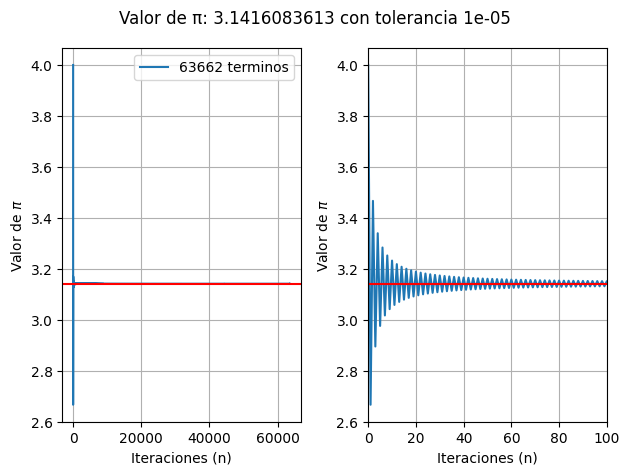

In [29]:
def calcular_pi_historia(tolerancia):
  """
  Calcula el valor de pi usando la serie de Leibniz y guarda los valores
  intermedios en una lista.
  """
  # Inicializa la suma y el contador de términos

  suma = 0
  n = 0
  # Lista para almacenar los valores de pi
  valor_pi = []
  while True:
    # Calcula el término de la serie
    termino = (-1)**n / (2*n + 1)
    # Actualiza la suma
    suma += termino
    # Almacena el valor de pi
    valor_pi.append(4 * suma)
    # Verifica si el término es menor que la tolerancia
    if abs(termino/suma) < tolerancia:
      break
    # Si no se cumple la tolerancia, incrementa el contador continuando al siguiente término
    n += 1
  return 4 * suma, n, valor_pi

# Definimos la tolerancia
tol = 1e-5

# Calculamos el valor de pi y la cantidad de términos necesarios
valor, n, anteriores = calcular_pi_historia(tol)

# Graficamos los resultados
figs, axs = plt.subplots(1, 2)

axs[0].plot(range(n+1), anteriores, label = f'{n} terminos')
axs[0].legend()
axs[0].set_ylabel('Valor de $\\pi$')
axs[0].set_xlabel('Iteraciones (n)')
axs[0].axhline(np.pi, color = 'red')
axs[0].grid()

axs[1].plot(range(n+1), anteriores)
axs[1].set_ylabel('Valor de $\\pi$')
axs[1].set_xlabel('Iteraciones (n)')
axs[1].set_xlim(0, 100)
axs[1].axhline(np.pi, color = 'red')
axs[1].grid()

figs.suptitle(f'Valor de π: {valor:.10f} con tolerancia {tol}')
plt.tight_layout()
plt.show()



## Truncamiento de la serie

En ocasiones alcanzar la convergencia deseada (dentro de cierta tolerancia), se hace una tarea compleja y computacionalmente costosa. Es por esto, que podemos definir un criterio de truncamiento que no exceda el número máximo de iteraciones (ciclos o términos) que queremos computar. Con esto, podemos controlar la eficiencia y el tiempo asociado a nuestros algoritmos.

In [31]:
def calcular_pi_truncado(tolerancia, max_iteraciones):
  '''
    Calcula el valor de pi usando la serie de Leibniz y guarda los valores
    intermedios en una lista. Se detiene cuando el término es menor que la
    tolerancia o se alcanza el número máximo de iteraciones.
    Parámetros:
    tolerancia: La tolerancia para detener el cálculo.
    max_iteraciones: El número máximo de iteraciones a realizar.
    Devuelve:
    - El valor aproximado de pi.
    - Una lista con los valores intermedios de pi.
  '''
  suma = 0
  n = 0
  valores_pi = []
  termino_ant = 0
  # Bucle para calcular los términos de la serie
  while n < max_iteraciones:
    termino = (-1)**n / (2*n + 1)
    suma += termino
    valores_pi.append(4 * suma)
    # Verifica si el término es menor que la tolerancia
    if n > 0 and abs(termino - termino_ant) < tolerancia:
      break
    # Si no se cumple la tolerancia, incrementa el contador continuando al siguiente término
    # y guarda el término anterior
    termino_ant = termino
    n += 1
  return 4 * suma, valores_pi

valor, anteriores = calcular_pi_truncado(1e-8, 10000000)
print(f'El valor de pi es {valor} con {len(anteriores)} términos')

El valor de pi es 3.1415925535897915 con 10000000 términos


## Actividad en clase

La serie de Taylor para la función seno ($\sin(x)$) centrada en $a=0$ (también conocida como la serie de Maclaurin) se expresa de la siguiente manera:

$$\sin(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!} x^{2n+1} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots$$

* Encontrar la aproximación para $x = \pi/4$ cambiando el valor de tolerancia, ¿Qué puede concluir de la serie?
* Hallar el error relativo y porcentual.
* Grafique los valores asociados a la serie después de cada iteración.
* Repita para la serie:
$$\ln(1+x) = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}}{n} x^n$$

### Ejemplo con Serie Exponencial

La función exponencial $e^x$ puede ser aproximada mediante su serie de Taylor:

$$e^x = 1 + x + x^2/2! + x^3/3! + x^4/4! + ...$$

En la práctica, truncamos esta serie infinita para obtener una aproximación. El error de aproximación surge de este truncamiento.

* Aproximación de $e^1$

Calcularemos $e^1$ usando diferentes números de términos de la serie y analizaremos el error.

Valor real de $e^1 ≈ 2.71828182845904$

Observaciones:
1. A medida que aumentamos el número de términos, la aproximación mejora significativamente.
2. Con solo 2 términos, tenemos un error relativo de más del 26%.
3. Al usar 10 términos, el error relativo se reduce a menos del 0.00002%.
4. La convergencia es rápida para $e^1$, pero para valores más grandes de $x$, se necesitarían más términos para lograr la misma precisión.


Usualmente $\pi$ se calcula usando el [Algoritmo de Chudnovsky](https://es.wikipedia.org/wiki/Algoritmo_de_Chudnovsky)



In [11]:
def factorial(n):
    if n == 0 or n == 1:
        return 1
    return n * factorial(n-1)

def aproximar_exp(x, n_terminos):
    aproximacion = sum(x**i / factorial(i) for i in range(n_terminos))
    return aproximacion

def calcular_errores(x, n_terminos):
    valor_real = math.exp(x)
    aproximacion = aproximar_exp(x, n_terminos)
    error_absoluto = abs(valor_real - aproximacion)
    error_relativo = (error_absoluto / valor_real) * 100

    print(f"Número de términos: {n_terminos}")
    print(f"Aproximación: {aproximacion:.10f}")
    print(f"Error Absoluto: {error_absoluto:.10f}")
    print(f"Error Relativo: {error_relativo:.8f}%")
    print()

# Valor a aproximar
x = 1  # e^1

print(f"Valor real de e^{x}: {math.exp(x):.10f}")
print()

# Calcular errores para diferentes números de términos
for n in [2, 3, 5, 10]:
    calcular_errores(x, n)

Valor real de e^1: 2.7182818285

Número de términos: 2
Aproximación: 2.0000000000
Error Absoluto: 0.7182818285
Error Relativo: 26.42411177%

Número de términos: 3
Aproximación: 2.5000000000
Error Absoluto: 0.2182818285
Error Relativo: 8.03013971%

Número de términos: 5
Aproximación: 2.7083333333
Error Absoluto: 0.0099484951
Error Relativo: 0.36598468%

Número de términos: 10
Aproximación: 2.7182815256
Error Absoluto: 0.0000003029
Error Relativo: 0.00001114%



## Error por Cancelación Sustractiva

El **error por cancelación sustractiva** ocurre cuando se restan dos números muy cercanos en magnitud, lo que puede generar una pérdida significativa de precisión debido a las limitaciones de representación numérica de punto flotante.

#### Ejemplo teórico:

Supongamos que tenemos los siguientes números en punto flotante de precisión simple:

$$
a = 1.23456789 \times 10^6
$$

$$
b = 1.23456780 \times 10^6
$$

Si restamos \( a - b \), deberíamos obtener:

$$
a - b = (1.23456789 \times 10^6) - (1.23456780 \times 10^6) = 9
$$

Pero en un sistema de punto flotante, los números no se pueden representar con precisión infinita, lo que lleva a una pérdida de precisión en la operación de resta. La respuesta puede no ser exactamente 9, sino algo como:

$$
8.0
$$

Este error se debe a la **cancelación de los dígitos significativos** comunes entre $a$ y $b$, y el sistema solo puede mantener la precisión limitada de los dígitos menos significativos, lo que introduce una inestabilidad.

In [12]:
# Operación con 64 bits
x = 123456789.
y = 123456780.
print(x - y)   # da 9

# Operación con 32 bits
x32 = np.float32(x)
y32 = np.float32(y)
print(x32 - y32) # da 8.0

9.0
8.0


In [13]:
# Dos números muy cercanos
a = 1.0
b = 0.999999999999999

# Operación que puede llevar a cancelación sustractiva
diferencia_directa = a - b
print("Diferencia directa:", diferencia_directa)

# Utilizando una fórmula alternativa para evitar la cancelación
diferencia_alternativa = (a**2 - b**2) / (a + b)
print("Diferencia alternativa:", diferencia_alternativa)

# Comparando con el valor exacto (que conocemos en este caso)
valor_exacto = 0.000000000000001
print("Valor exacto:", valor_exacto)

Diferencia directa: 9.992007221626409e-16
Diferencia alternativa: 9.992007221626413e-16
Valor exacto: 1e-15


### Ejemplo usando la raíz cuadrada

Consideremos la función:

$$
f(x) = \sqrt{x+1} - \sqrt{x}
$$

Para valores grandes de $x$, el valor de $ \sqrt{x+1} $ y $ \sqrt{x} $ son muy cercanos, lo que puede llevar a una **cancelación sustractiva**.

* Forma original de la expresión

$$
f(x) = \sqrt{x+1} - \sqrt{x}
$$

Cuando $x$ es grande, las raíces cuadradas de $x+1$ y $x$ son muy cercanas, lo que lleva a la cancelación de cifras significativas al restarlas.

* Forma reescrita para evitar cancelación

Multiplicamos por el conjugado para evitar la cancelación sustractiva:

$$
f(x) = \frac{(\sqrt{x+1} - \sqrt{x})(\sqrt{x+1} + \sqrt{x})}{\sqrt{x+1} + \sqrt{x}} = \frac{(x+1) - x}{\sqrt{x+1} + \sqrt{x}} = \frac{1}{\sqrt{x+1} + \sqrt{x}}
$$

Esta forma evita la cancelación al reescribir la expresión de una manera más estable.

In [14]:
# Definimos la función original
def f_original(x):
    return math.sqrt(x + 1) - math.sqrt(x)

# Definimos la función reescrita que evita cancelación
def f_reescrita(x):
    return 1 / (math.sqrt(x + 1) + math.sqrt(x))

# Valor grande de x
x = 1e8

# Cálculo con ambas formas
resultado_original = f_original(x)
resultado_reescrito = f_reescrita(x)

print(f"Resultado usando la forma original: {resultado_original}")
print(f"Resultado usando la forma reescrita: {resultado_reescrito}")

Resultado usando la forma original: 5.000000055588316e-05
Resultado usando la forma reescrita: 4.9999999874999996e-05


In [15]:
x = sp.Symbol('x')
f_original = sp.sqrt(x + 1) - sp.sqrt(x)
f_original_evaluada = f_original.subs(x, 1e8)
print(f"Resultado usando la forma original: {f_original_evaluada}")

error = abs(f_original_evaluada - resultado_reescrito)/abs(f_original_evaluada)
print(f"Error: {error*100}")

Resultado usando la forma original: 0.0000500000005558832
Error: 0.00000136176631606897


## Error de Acumulación en Computación

El **error de acumulación** en computación ocurre cuando pequeñas imprecisiones en las operaciones aritméticas, generalmente debido a la representación finita de números en punto flotante, se acumulan a lo largo de varias operaciones. Con el tiempo, estas pequeñas inexactitudes pueden generar un error significativo en los resultados finales.

$$\epsilon_{re}=\sqrt{N}\epsilon_m$$

donde $\epsilon_m$ es el error de la maquina. Así por ejemplo, se puede afirmar que el error total en un proceso de convergencia será,

$$\epsilon_{total}=\epsilon_{tr}+\sqrt{N}\epsilon_m,$$

donde $\epsilon_{tr}$ es el error de truncación después de $N$ pasos.

Los números en punto flotante tienen una precisión limitada porque están representados por un número finito de bits. Esta limitación puede llevar a imprecisiones en los cálculos, que se agravan con el número de operaciones.

### Ejemplo

Supongamos que queremos sumar el número $0.1$ diez veces y esperamos obtener como resultado $1.0$. Sin embargo, debido a la imprecisión en la representación del número $0.1$, el resultado final puede diferir del valor esperado.



In [16]:
# Inicializamos la variable
suma = 0.0

# Sumar 0.1 diez veces
for _ in range(10):
    suma += 0.1

# Mostrar el resultado
print(f"Resultado de sumar 0.1 diez veces: {suma}")

Resultado de sumar 0.1 diez veces: 0.9999999999999999


# Comparación de métodos para resolver ecuaciones cuadráticas

En este ejemplo, compararemos tres métodos para resolver ecuaciones cuadráticas:
1. Fórmula cuadrática estándar
2. Fórmula cuadrática alternativa
3. Solución simbólica con SymPy


La ecuación cuadrática general es:

$$
ax^2 + bx + c = 0
$$

La fórmula estándar para encontrar las raíces es:

$$
x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}
$$

### Problema de cancelación sustractiva

El problema surge cuando $b^2$ es mucho mayor que $4ac$. En estos casos, al calcular $-b \pm \sqrt{b^2 - 4ac}$, puede ocurrir una cancelación sustractiva, lo que genera una pérdida de precisión cuando se restan dos números cercanos en magnitud.

### Fórmula alternativa

Para evitar esta cancelación, podemos utilizar la siguiente fórmula modificada. En lugar de calcular ambas raíces usando la fórmula cuadrática estándar, calculamos una raíz de forma tradicional y la otra usando la relación entre las raíces.

1. Si $b > 0$, la primera raíz se calcula como:

   $$
   x_1 = \frac{-b - \sqrt{b^2 - 4ac}}{2a}
   $$

   La segunda raíz se puede calcular usando la relación:

   $$
   x_2 = \frac{2c}{-b - \sqrt{b^2 - 4ac}}
   $$

2. Si $b < 0$, la primera raíz se calcula como:

   $$
   x_1 = \frac{-b + \sqrt{b^2 - 4ac}}{2a}
   $$

   Y la segunda raíz se calcula como:

   $$
   x_2 = \frac{2c}{-b + \sqrt{b^2 - 4ac}}
   $$

### ¿Por qué esta fórmula es más estable?

Esta técnica evita la cancelación sustractiva al minimizar la resta directa entre dos números cercanos. En lugar de restar directamente $b$ y $\sqrt{b^2 - 4ac}$, utilizamos la fórmula modificada para calcular una raíz, y luego obtenemos la otra raíz de manera más precisa usando la relación entre las raíces.


In [17]:
import sympy as sp
def sympy_solve(a, b, c):
    x = sp.Symbol('x')
    equation = a*x**2 + b*x + c
    return sp.solve(equation, x)

In [18]:
def cuadratica(a, b, c):
    discriminante = (b**2 - 4*a*c)**0.5
    x1 = (-b - discriminante) / (2*a)
    x2 = (-b + discriminante) / (2*a)
    return x1, x2

In [19]:
def cuadratica_alternativa(a, b, c):
  discriminante = (b**2 - 4*a*c)**0.5
  if b > 0:
    x1 = (-b - discriminante) / (2*a)
    x2 = 2*c / (-b - discriminante)
  else:
    x1 = (-b + discriminante) / (2*a)
    x2 = 2*c / (-b + discriminante)
  return x1, x2

In [20]:
a = 1
b = 1e8
c = 1

resultado = cuadratica(a, b, c)
resultado_alt = cuadratica_alternativa(a, b, c)
solucion = sympy_solve(a, b, c)

print("Resultados usando la fórmula cuadrática estándar:")
print(f"x1 = {resultado[0]}")
print(f"x2 = {resultado[1]}")

print("\nResultados usando la fórmula cuadrática alternativa:")
print(f"x1 = {resultado_alt[0]}")
print(f"x2 = {resultado_alt[1]}")

print("\nResultados usando SymPy:")
print(f"x1 = {solucion[0]}")
print(f"x2 = {solucion[1]}")

Resultados usando la fórmula cuadrática estándar:
x1 = -100000000.0
x2 = -7.450580596923828e-09

Resultados usando la fórmula cuadrática alternativa:
x1 = -100000000.0
x2 = -1e-08

Resultados usando SymPy:
x1 = -100000000.000000
x2 = -1.00000000000000E-8


In [21]:
# Función para verificar los resultados
def verify_result(x, a, b, c):
    return a*x**2 + b*x + c

print("\nVerificación de resultados:")
print(f"Estándar x1: {verify_result(resultado[0], a, b, c)}")
print(f"Estándar x2: {verify_result(resultado[1], a, b, c)}")
print(f"Alternativa x1: {verify_result(resultado_alt[0], a, b, c)}")
print(f"Alternativa x2: {verify_result(resultado_alt[1], a, b, c)}")
print(f"SymPy x1: {verify_result(solucion[0], a, b, c)}")
print(f"SymPy x2: {verify_result(solucion[1], a, b, c)}")


Verificación de resultados:
Estándar x1: 1.0
Estándar x2: 0.2549419403076172
Alternativa x1: 1.0
Alternativa x2: 1.1102230246251565e-16
SymPy x1: 1
SymPy x2: 1.11022302462516E-16
